In [68]:
%pip install scipy
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

# Make graph graphics more sharp and legible
%config InlineBackend.figure_format = 'retina'


Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('../../Dataset/telecom_churn.csv')

In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

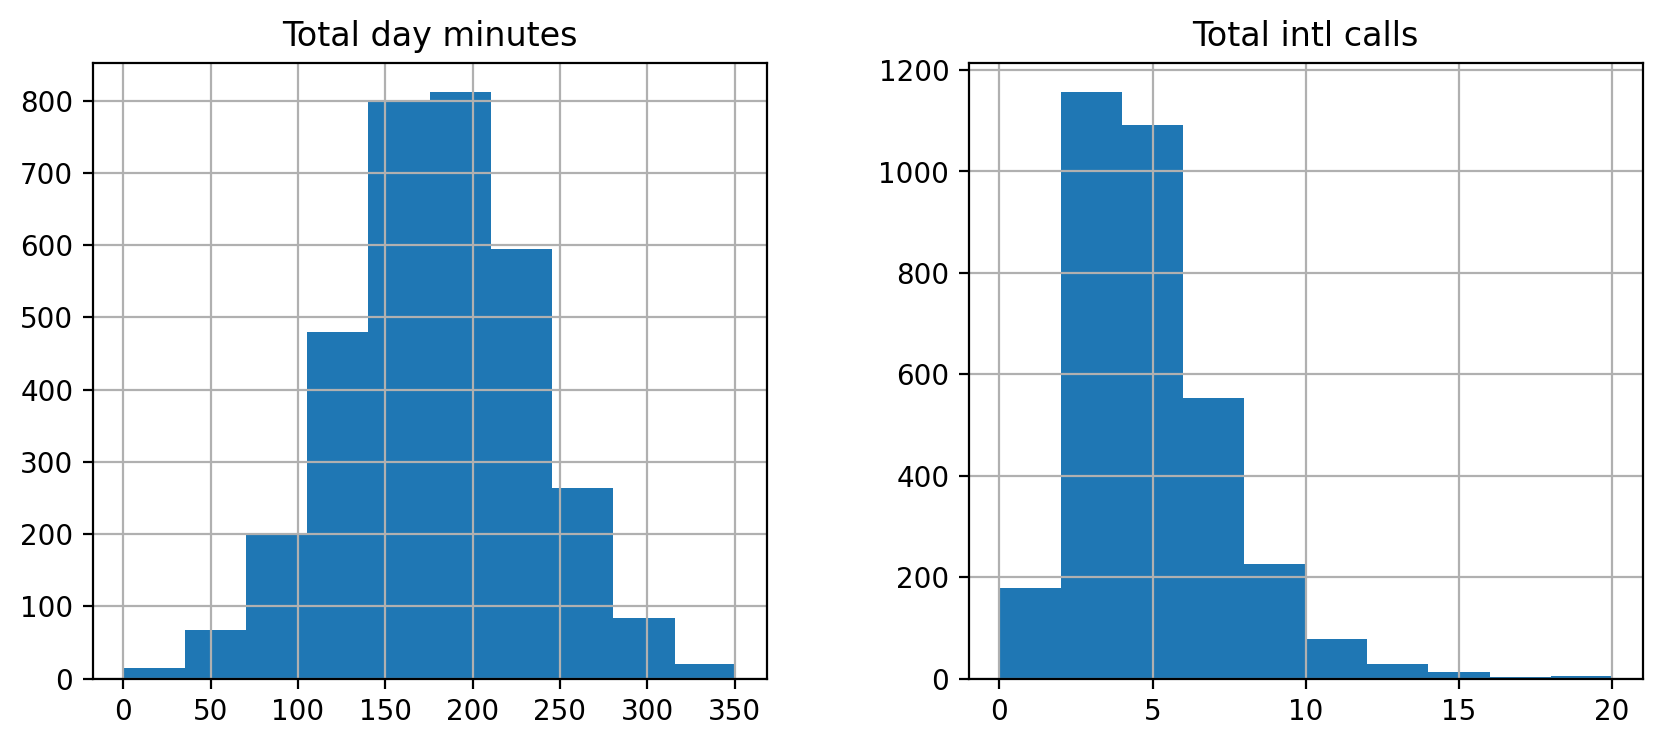

In [19]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

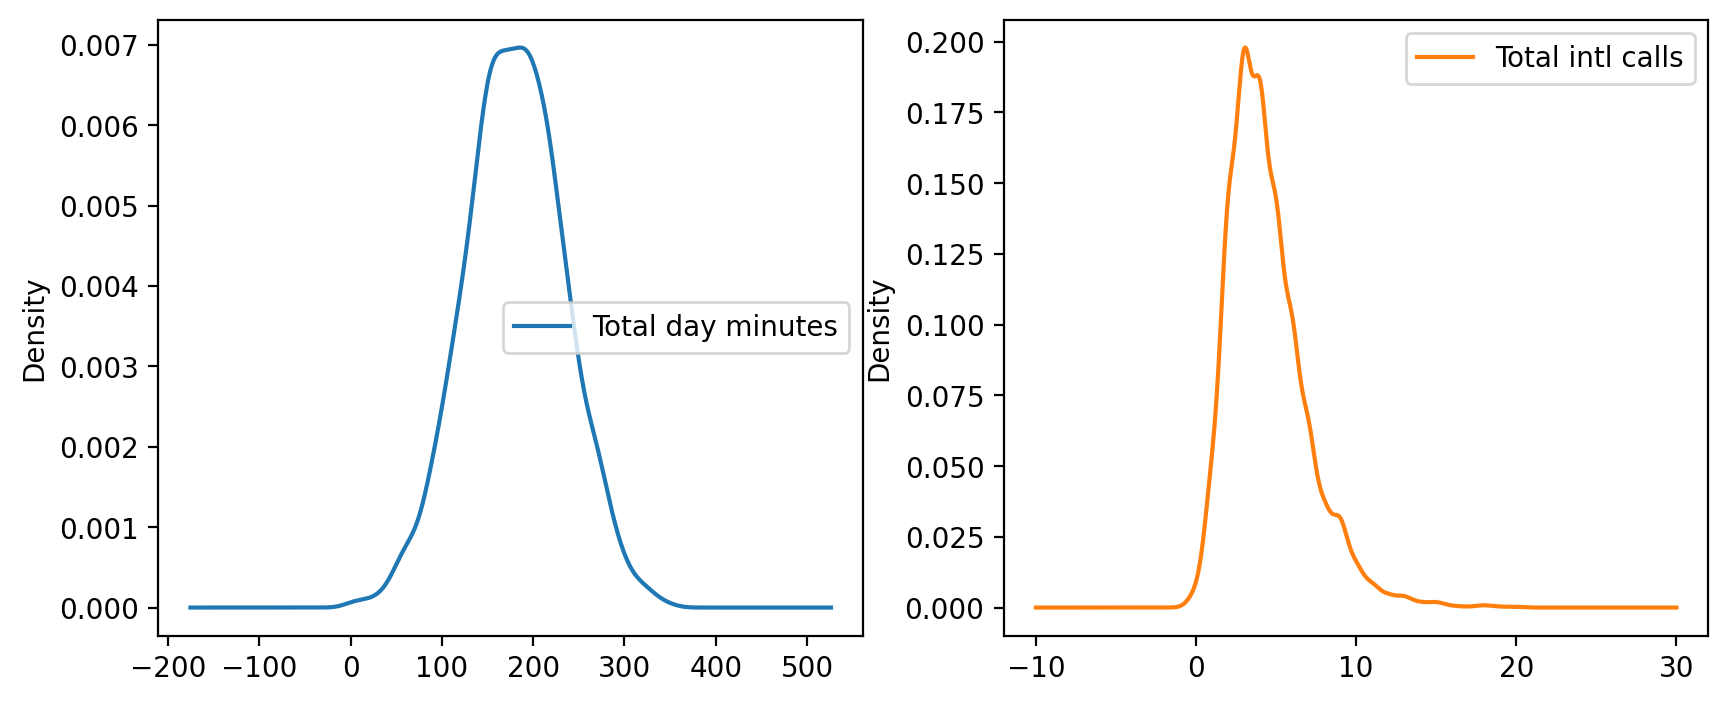

In [31]:
df[features].plot(kind='kde', subplots=True, layout=(1,2), sharex=False, figsize=(10,4))

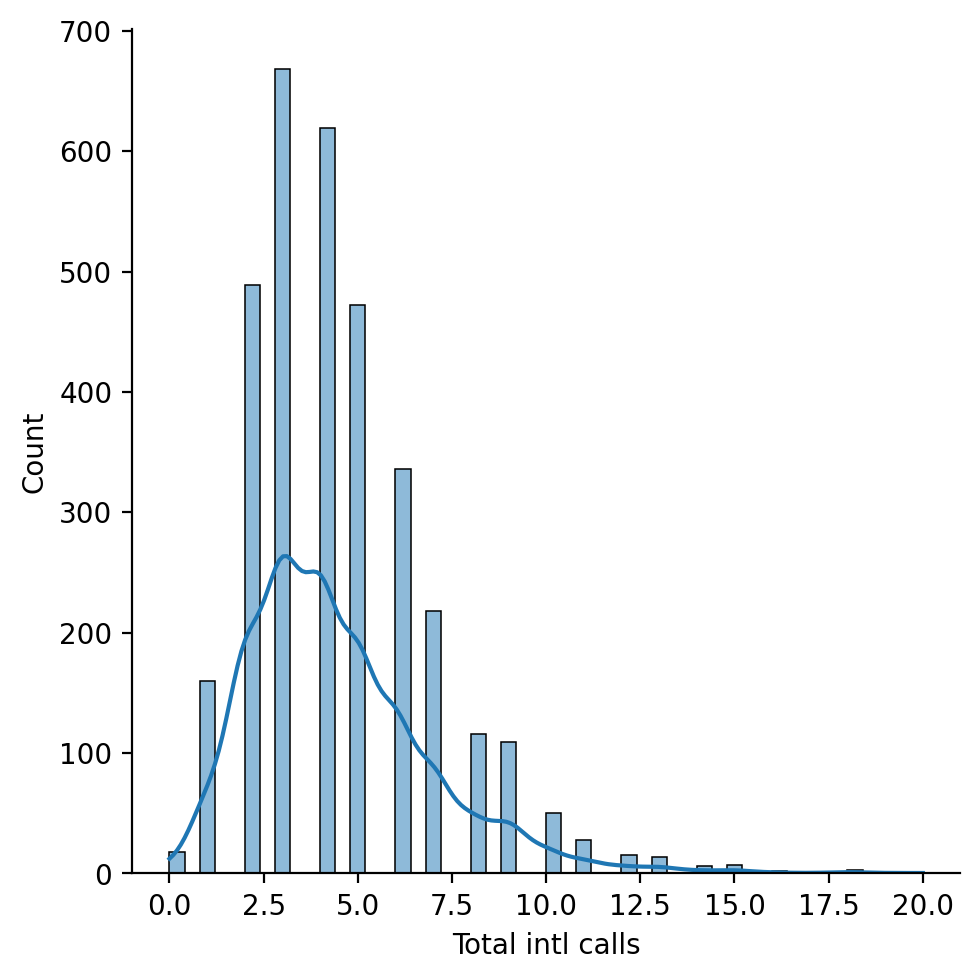

In [47]:
sns.displot(df['Total intl calls'], kde=True)


<Axes: xlabel='Total intl calls'>

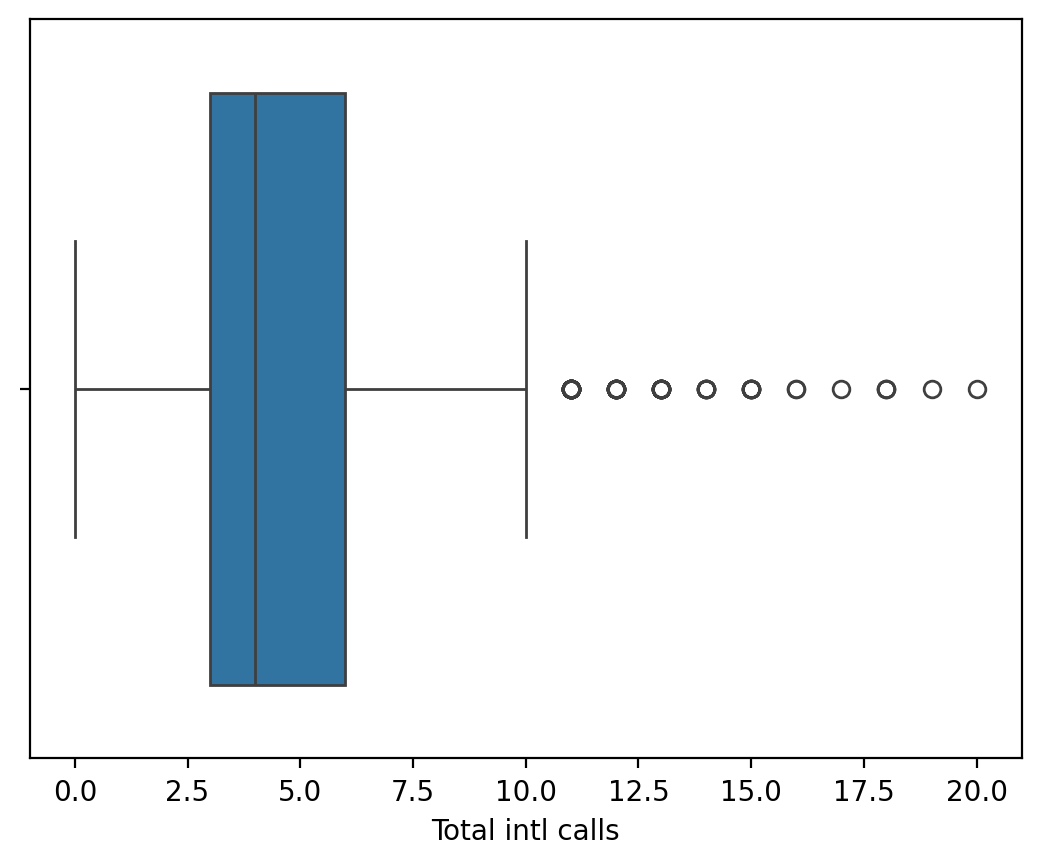

In [48]:
sns.boxplot(x='Total intl calls', data=df)

<Axes: ylabel='Total intl calls'>

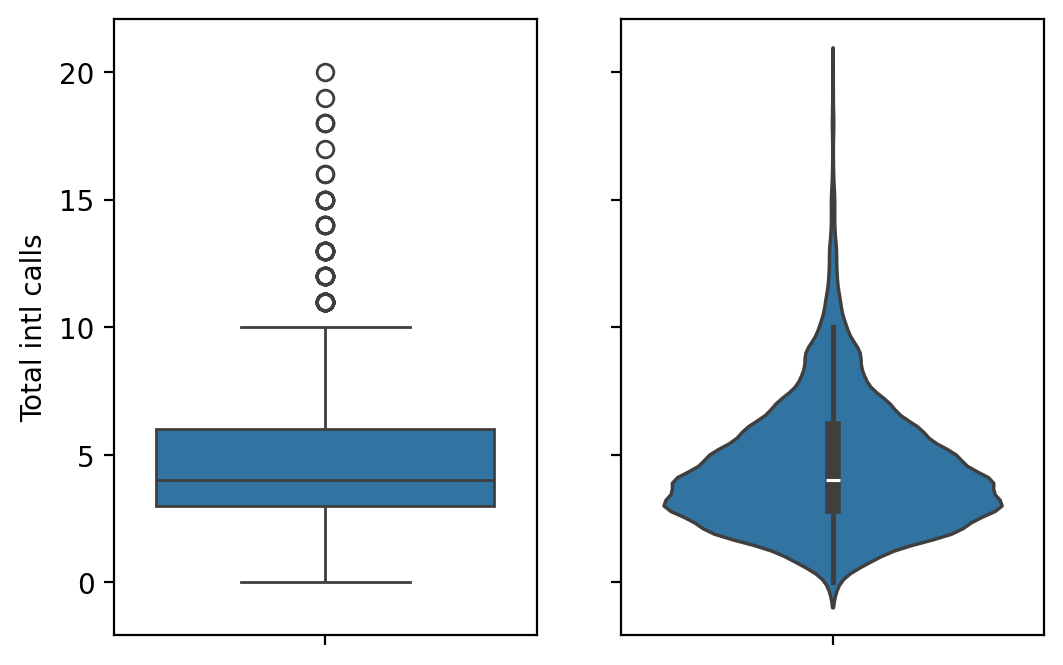

In [54]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6,4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

In [55]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [59]:
df.Churn.value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='Customer service calls', ylabel='count'>

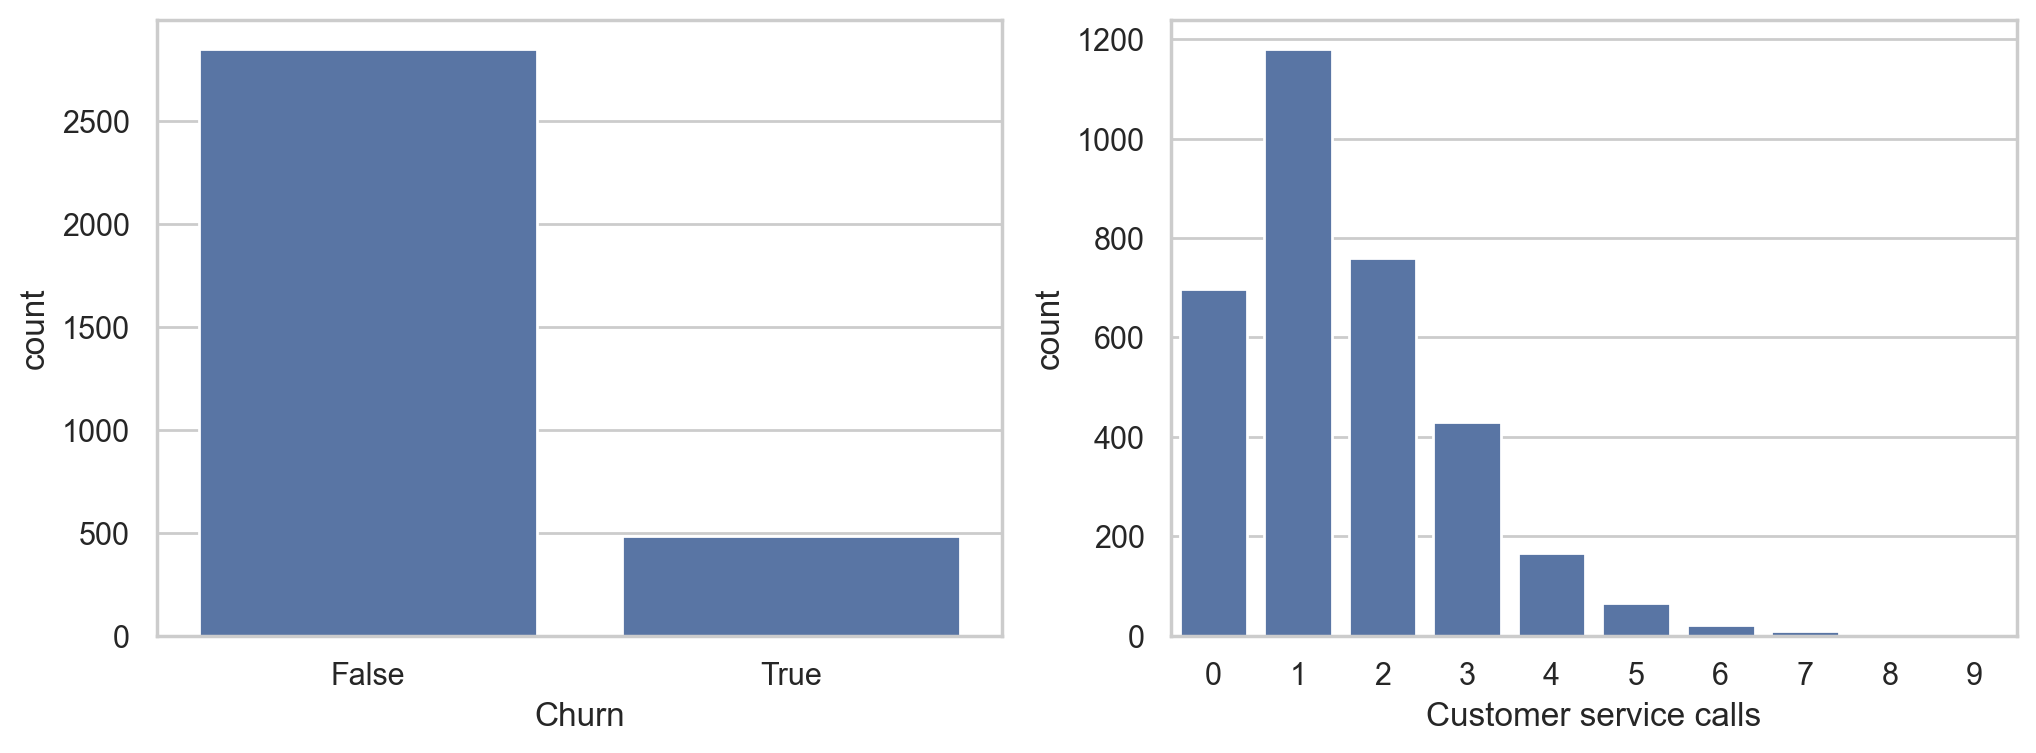

In [69]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])


<Axes: >

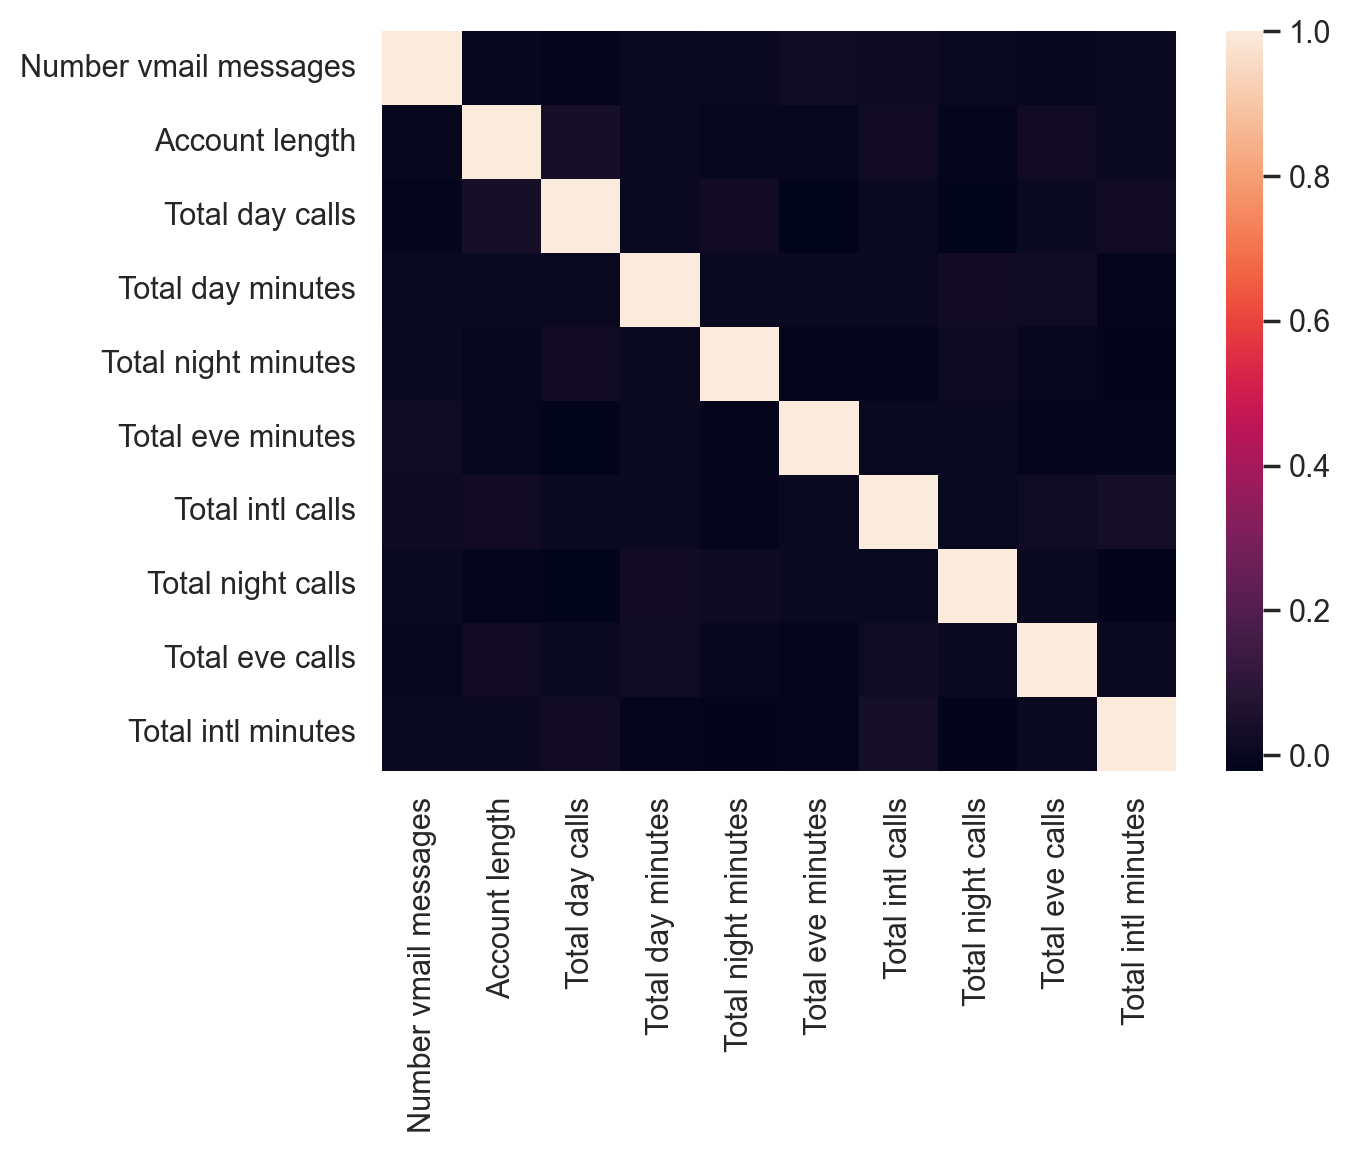

In [76]:
# Drop non-numerical variables
numerical = list(set(df.columns) - {
    'State',
    'International plan',
    'Voice mail plan',
    'Area code',
    'Churn',
    'Customer service calls',
    'Total day charge',
    'Total eve charge',
    'Total night charge',
    'Total intl charge',
})

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

<Axes: >

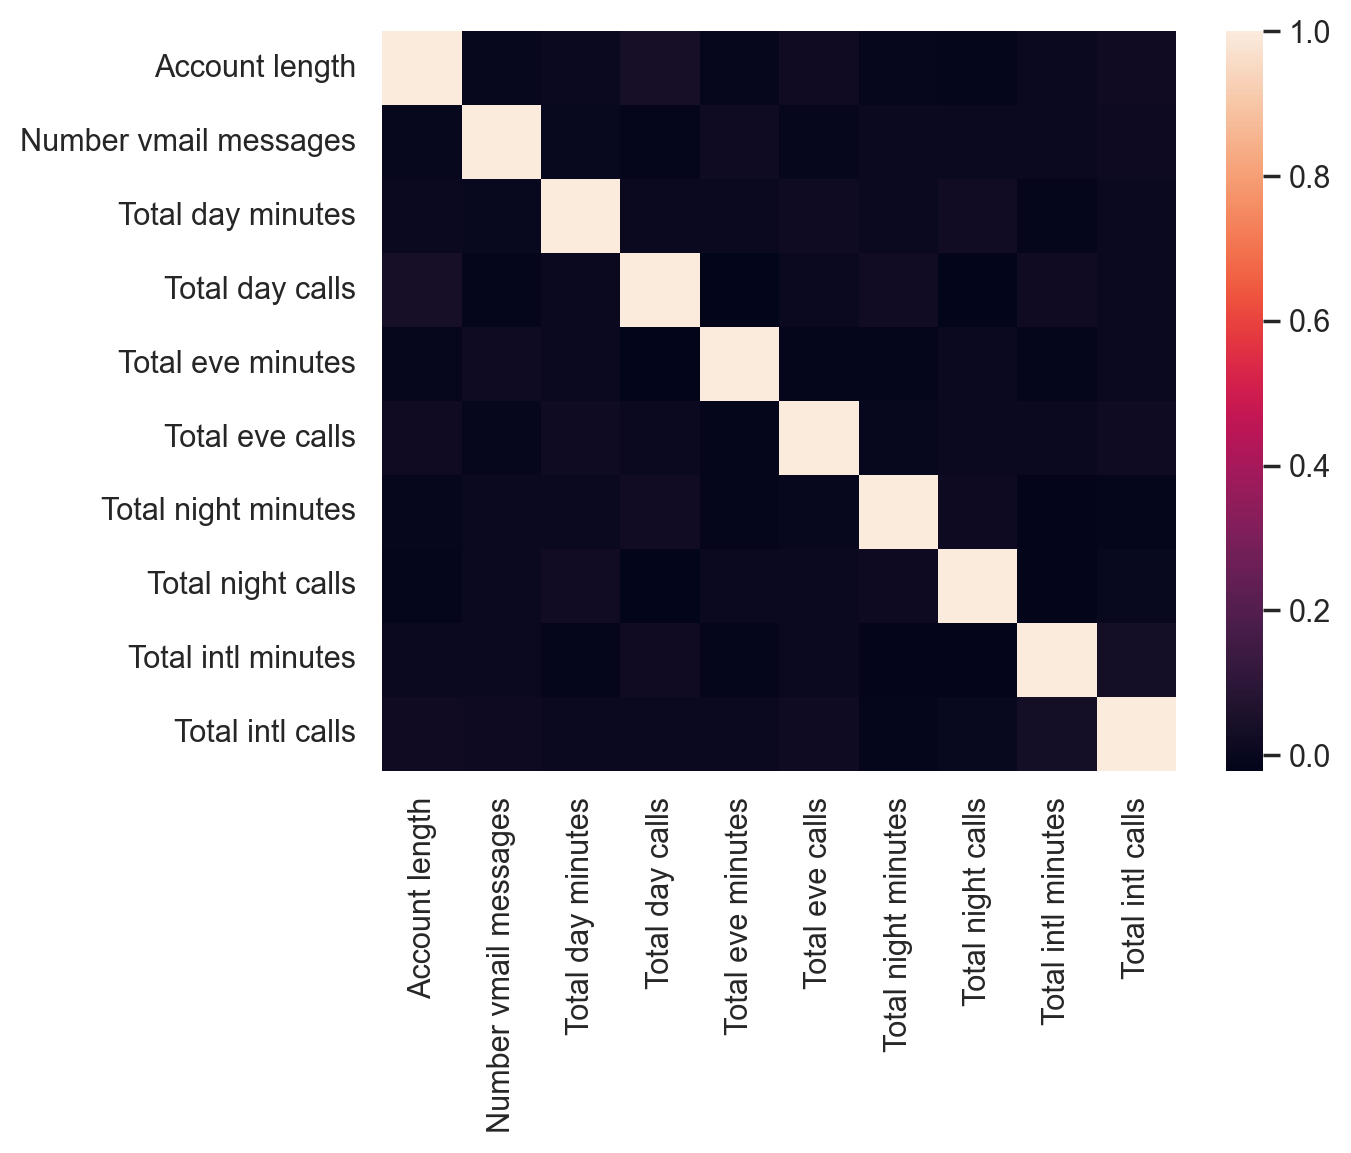

In [78]:
numerical_df = df[[
    # 'State', 
    'Account length', 
    # 'Area code', 'International plan', 'Voice mail plan', 
    'Number vmail messages', 'Total day minutes', 'Total day calls', 
    # 'Total day charge', 
    'Total eve minutes', 'Total eve calls', 
    # 'Total eve charge', 
    'Total night minutes', 'Total night calls', 
    # 'Total night charge', 
    'Total intl minutes', 'Total intl calls', 
    # 'Total intl charge', 'Customer service calls', 'Churn'
    ]]

corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix)

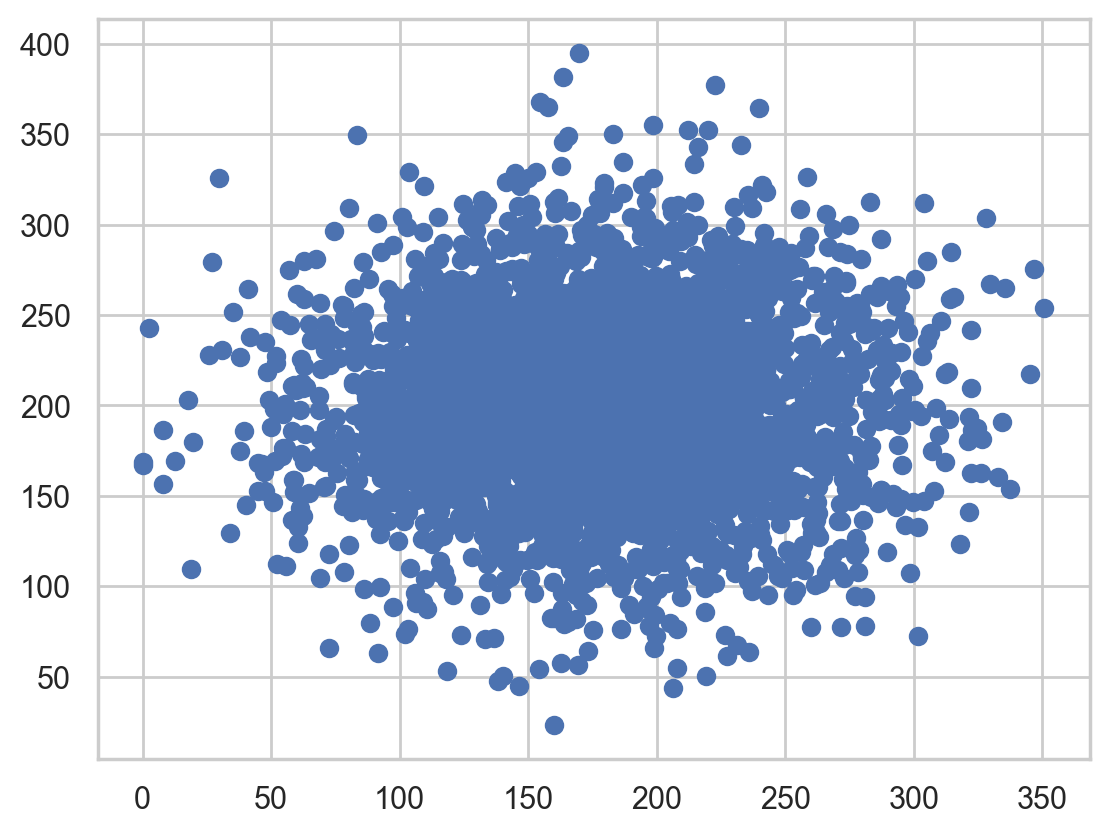

In [79]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

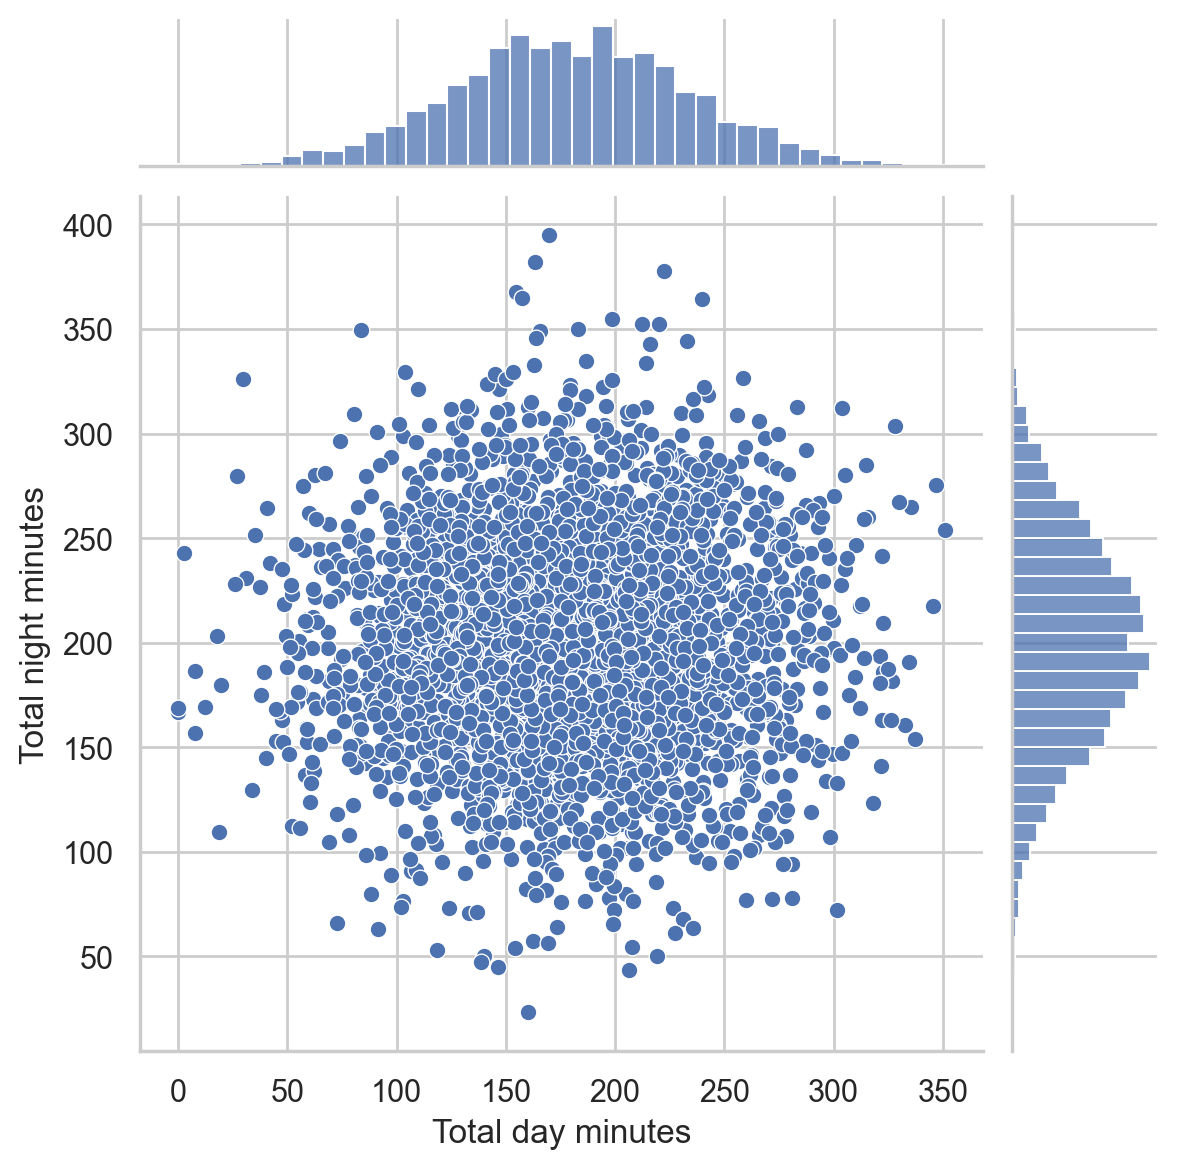

In [80]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter')

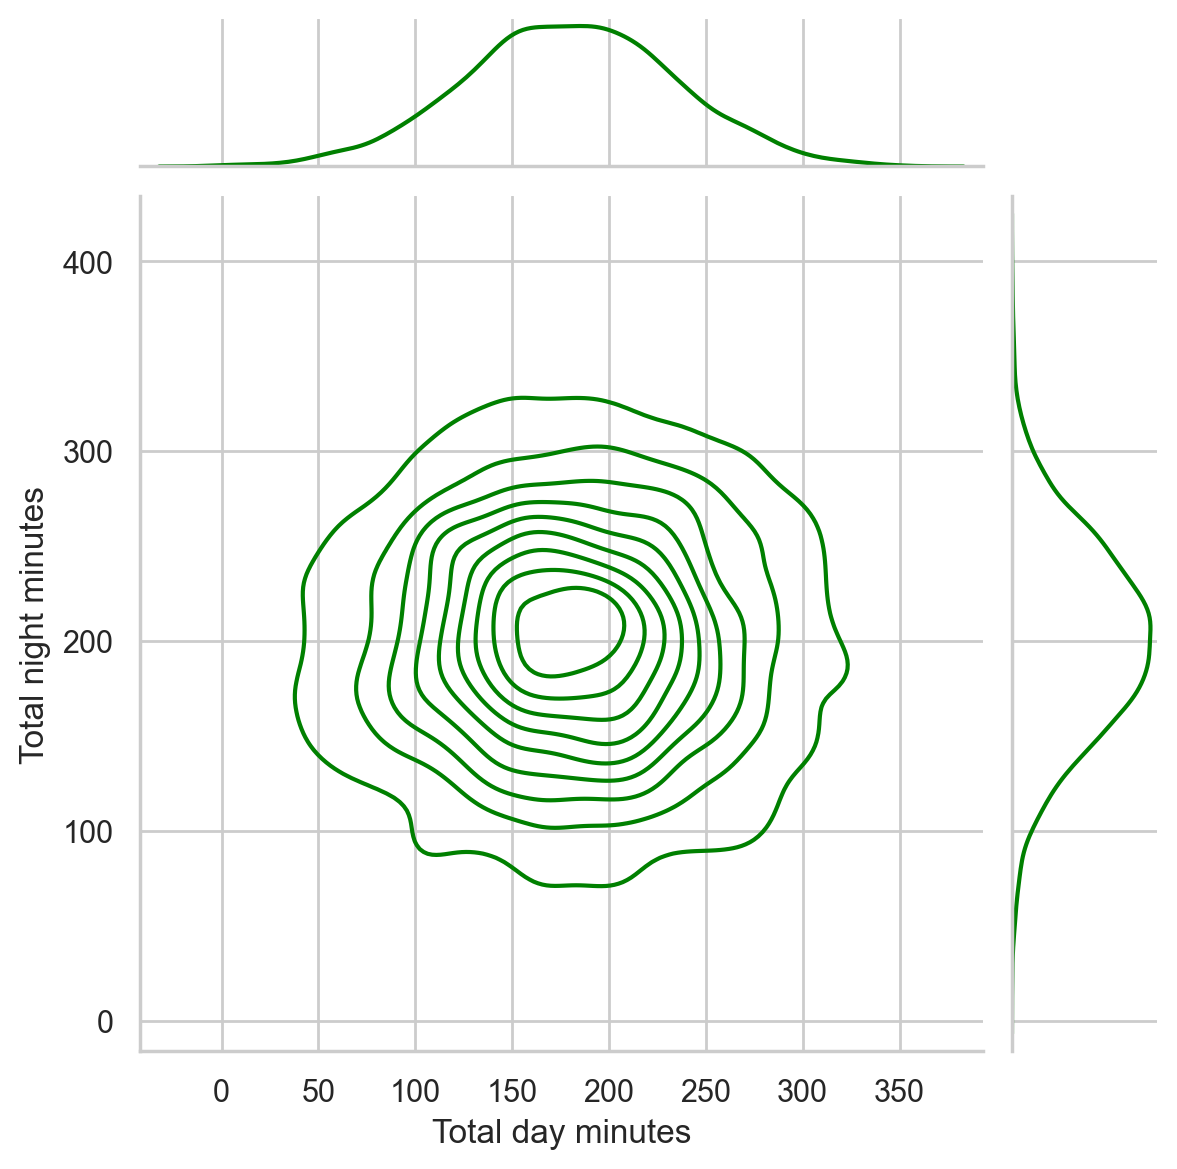

In [86]:
sns.jointplot(
    x='Total day minutes', y='Total night minutes', data=df, kind='kde', color='green'
)
# sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter')
